In [1]:
from sklearn.datasets import fetch_openml
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
digits = fetch_openml('mnist_784', version = 1 )

In [3]:
x , y = digits['data'], digits['target']

In [4]:
len(x)

70000

In [42]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

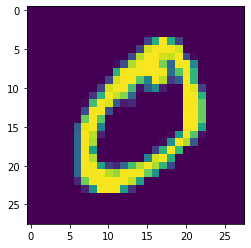

In [43]:
plt.imshow(x[1].reshape(-1,28))
plt.show()

In [44]:
# np.unique(y_7, return_counts=True)

In [45]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [46]:
# x_train,x_test,y_7_train,y_7_test = train_test_split(x,y_7,test_size = 0.2, random_seed = 42)

In [47]:
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

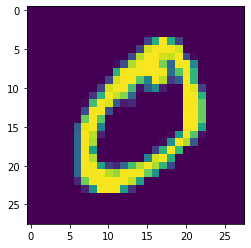

In [48]:
plt.imshow(x_train[1].reshape(-1,28))

In [49]:
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
shuffle_index

array([12628, 37730, 39991, ...,   860, 15795, 56422])

In [50]:
x_train = x_train[shuffle_index]
y_train = y_train[shuffle_index]

In [51]:
y_7 = (y_train=='7')

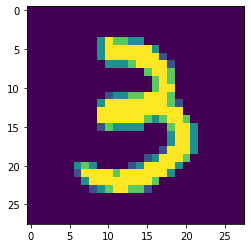

In [52]:
plt.imshow(x_train[1].reshape(-1,28))

In [53]:
from sklearn.linear_model import SGDClassifier

In [54]:
sgd_clf = SGDClassifier(random_state=42, max_iter=10)

In [55]:
sgd_clf.fit(x_train,y_7)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [56]:
y_test[:10]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9'], dtype=object)

In [57]:
sgd_clf.predict([x_test[3]])

array([False])

In [58]:
from sklearn.metrics import classification_report

In [59]:
y_pred = sgd_clf.predict(x_train)
y_pred

array([ True, False, False, ..., False, False, False])

In [60]:
classification_report(y_7,y_pred,output_dict = True)['True']

{'precision': 0.8437147688838782,
 'recall': 0.9556264964086193,
 'f1-score': 0.8961904049098122,
 'support': 6265}

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_7,y_pred)

0.9768833333333333

In [63]:
from sklearn.model_selection import cross_val_predict
score = cross_val_predict(sgd_clf,x_train,y_7,method='decision_function',cv = 3)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [64]:
from sklearn.metrics import precision_recall_curve

In [65]:
precision, recall,threshold = precision_recall_curve(y_7,score)

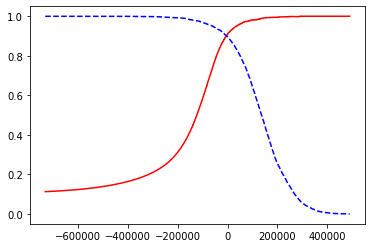

In [66]:
plt.plot(threshold, precision[:-1],'r-')
plt.plot(threshold, recall[:-1],'b--')
plt.show()

In [67]:
len(precision)

55493

In [68]:
len(threshold)

55492

In [69]:
from sklearn.metrics import roc_curve

In [70]:
fpr,tpr,thresholds = roc_curve(y_7,score)

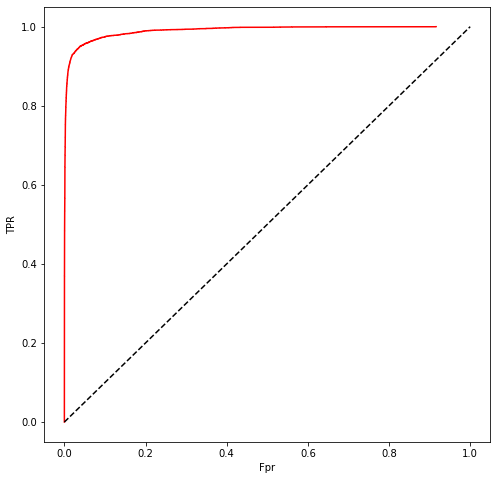

In [78]:
plt.figure(figsize = (8,8))
plt.plot( fpr[:-1],tpr[:-1],'r-')
# plt.plot(threshold, recall[:-1],'b--')
plt.plot([0,1], [0,1],'k--')
plt.xlabel('Fpr')
plt.ylabel("TPR")
plt.show()

In [79]:
from sklearn.metrics import roc_auc_score
score_roc = roc_auc_score(y_7,score)

In [80]:
score_roc

0.990115112953811

In [84]:
scores = sgd_clf.decision_function([x_test[0]])
scores

array([160154.34180171])

In [85]:
sgd_clf_ = SGDClassifier(max_iter = 10, random_state=42)

In [86]:
sgd_clf_.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [87]:
scores = sgd_clf_.decision_function([x_test[0]])
scores

array([[-247774.91254933, -443092.68797838, -205195.53070039,
         -88051.88030867, -289576.0042005 , -255214.28809901,
        -434730.62667379,  141262.85806701, -197454.68045296,
         -94003.57021161]])

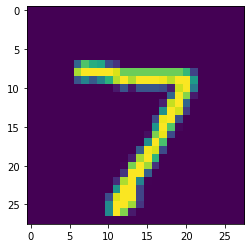

In [89]:
plt.imshow(x_test[0].reshape(-1,28))